In [30]:
from ephys import viz, core, clust, events, spiketrains
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neuraltda.topology2 as tp2
import glob
import os
%matplotlib inline

In [3]:
bp = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'

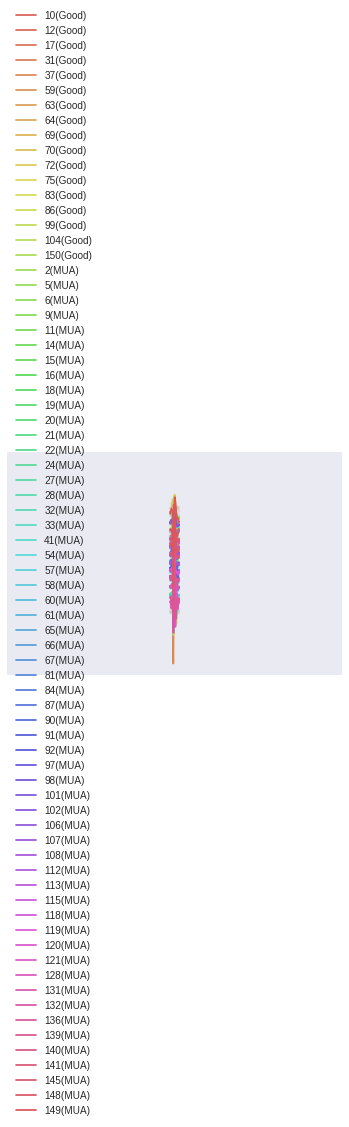

In [5]:
viz.plot_all_clusters(bp, )

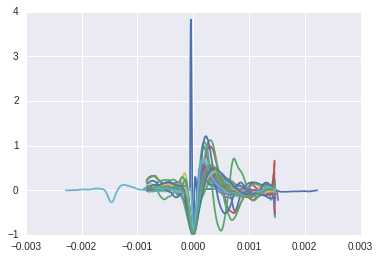

In [17]:
reload(viz)
clusters = core.load_clusters(bp)
fs = core.load_fs(bp)
cluster_group = ['Good', 'MUA']
clulist = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()
plt.figure()
for clu in clulist:
    viz.plot_spike_shape(bp, clu)

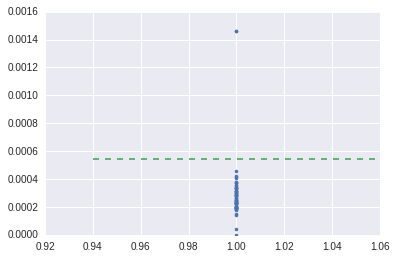

In [18]:
spwidths = []
for clu in clulist:
    spwidths.append(clust.get_width(bp, clu))
    
plt.plot(len(spwidths)*[1], spwidths, '.')
plt.plot([0.94, 1.06], 2*[0.000540], '--')

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  4.,
         4.,  5.,  2.,  0.,  4.,  7.,  2.,  3.,  2.,  1.,  1.,  3.,  1.,
         3.,  2.,  2.,  3.,  2.,  0.,  2.,  4.,  1.,  1.,  0.,  1.,  2.,
         1.,  0.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

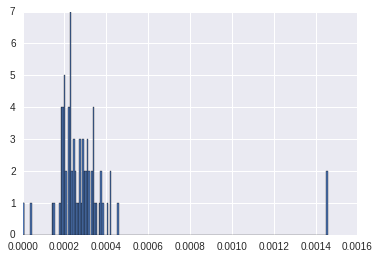

In [23]:
plt.hist(spwidths, bins=200)

In [10]:
clulist = clusters['cluster'].unique()
wide = []
narrow = []
thresh = 0.000540
for clu in clulist:
    sw = clust.get_width(bp, clu)
    if sw >= thresh:
        wide.append(clu)
    else:
        narrow.append(clu)


In [14]:
cluster_group = ['Good', 'MUA']
c2 = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()

In [16]:
clusters

,cluster,quality
0,0,Noise
1,2,MUA
2,3,Noise
3,4,Noise
4,5,MUA
5,6,MUA
6,7,Noise
7,8,Noise
8,9,MUA
9,10,Good


# Test for Auditory Response

In [24]:
bp = '/mnt/cube/btheilma/emily/B604/klusta/phy103116/Pen01_Lft_AP2300_ML1250__Site15_Z2780__B604_cat_P01_S15_1/'
blockPath = bp
spikes = core.load_spikes(bp)
clusters = core.load_clusters(bp)
fs = core.load_fs(bp)
trials = events.load_trials(bp)

In [7]:
trials

,recording,time_samples,stimulus,stimulus_end,response,response_time,consequence,correct,datetime,correction
0,1,50001,T3S3D-1,162501,R,164813.0,T,False,2016-07-05 13:00:07.100120,False
109,2,50001,T3S3D-1,162500,L,170231.0,F,True,2016-07-05 13:00:14.792760,True
219,3,50001,T3S3D40,162499,L,166542.0,f,True,2016-07-05 13:00:26.425200,False
330,4,50001,T3S3D40,162500,L,162502.0,F,True,2016-07-05 13:00:35.933960,False
440,5,50001,T3S3D40,162499,L,162680.0,f,True,2016-07-05 13:00:47.254400,False
473,6,50001,T3S8D40,162501,R,164790.0,F,True,2016-07-05 13:00:56.610000,False
484,7,50001,T3S3D40,162500,R,169945.0,T,False,2016-07-05 13:01:08.021800,False
495,8,50001,T3S3D40,162500,R,179319.0,T,False,2016-07-05 13:01:15.919760,True
506,9,50001,T3S3D40,162500,L,187544.0,f,True,2016-07-05 13:01:24.192640,True
1,10,50001,T3S8D-1,162500,L,166157.0,T,False,2016-07-05 13:01:34.541080,False


In [22]:
good_mua_clusters = clusters[clusters['quality'].isin(['Good', 'MUA'])]
good_mua_clusters_list = good_mua_clusters['cluster'].values


trial_store = []
for trial in trials.iterrows():
    
    rec = trial[1]['recording']
    print(rec)
    stim_start = trial[1]['time_samples']
    stim_end = trial[1]['stimulus_end']
    
    
    act_store = []
    for cluster in good_mua_clusters_list:
        prestim_spiketrain = spiketrains.get_spiketrain(rec, stim_start, cluster, spikes, [-2, 0], fs)
        stim_spiketrain = spiketrains.get_spiketrain(rec, stim_start, cluster, spikes, [0, float(stim_end)/fs], fs)
        fr_pre = len(prestim_spiketrain) / 2.0
        fr_stim = len(stim_spiketrain) / (float((stim_end - stim_start)) / fs)
        activity = (fr_stim - fr_pre) / fr_pre
        act_store.append(activity)
    trial_store.append(act_store)
    
trial_store = np.array(trial_store)

1


/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:20: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

In [17]:
window = [-2, 0]
samps = stim_start
bds = [w*fs+samps for w in window]
clu = cluster

window_mask = (
        (spikes['time_samples']>bds[0])
        & (spikes['time_samples']<=bds[1])
        )
    
perievent_spikes = spikes[window_mask]
    
mask = (
        (perievent_spikes['recording']==rec)
        & (perievent_spikes['cluster']==clu)
        )
t = (perievent_spikes['time_samples'][mask].values.astype(np.float_) - samps) / fs

ValueError: Lengths must match to compare

In [20]:
t1 = perievent_spikes['recording']==rec
t2 = (perievent_spikes['cluster']==clu)

ValueError: Lengths must match to compare

In [32]:
blockPath = '/home/brad/emily/P01S15/'
winSize = 10.0 #ms
thresh = 13.0
povers = 0.5
cluster_group = ['Good', 'MUA']
widenarrow_threshold = 0.000230 # sw threshold in seconds
stimsegmentInfo = [0, 0] # Sample/Distractor Period
prestimsegmentInfo = [-2000, 0]
spikes = core.load_spikes(blockPath)
trials = events.load_trials(blockPath)
fs = core.load_fs(blockPath)
povers = 0.0

# Get wide/narrow clusters
clusters = core.load_clusters(blockPath)
clusters_list = clusters[clusters.quality.isin(cluster_group)]['cluster'].unique()

# Bin and compute SCG
bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    stimsegmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='stimulus_period')
bdf_stim = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]

bfdict = tp2.do_dag_bin_lazy(blockPath, spikes, trials, clusters, fs, winSize,
                                    prestimsegmentInfo, cluster_group=['Good', 'MUA'],
                                    dt_overlap=povers*winSize, comment='prestimulus_period')
bdf_prestim = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]


Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76
Traceback (most recent call last):
  File "/home/brad/.conda/envs/neuraltda/lib/python2.7/logging/__init__.py", line 882, in emit
    stream.write(fs % msg)
AttributeError: 'int' object has no attribute 'write'
Logged from file topology2.py, line 76


Data Not already binned


In [48]:
import h5py as h5

stimdiffs = {}
with h5.File(bdf_stim) as stimfile:
    stims = stimfile.keys()
    with h5.File(bdf_prestim) as prestimfile:
        for stim in stimfile.keys():
            print(stim)
            stim_data = stimfile[stim]
            stim_acty = np.mean(stim_data['pop_tens'], axis=1)
            
            prestim_data = prestimfile[stim]
            prestim_acty = np.mean(prestim_data['pop_tens'], axis = 1)
            
            pdiff = np.divide(stim_acty - prestim_acty, prestim_acty)*100.0
            stimdiffs[stim] = pdiff

T-1S-1D3
T-1S-1D40
T3S3D-1
T3S3D40
T3S8D-1
T3S8D40
T40S40D-1
T40S40D3
T40S70D-1
T40S70D3


/home/brad/.conda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in divide


In [49]:
for stim in stims:
    avgactydiff = np.mean(stimdiffs[stim], axis=1)
    print(stim, avgactydiff)

(u'T-1S-1D3', array([ 25.38921591,  20.22701872,          nan,  28.04137738,
        13.52538053,  28.02847557,          nan,          nan,
                nan,          nan,  -7.76884422,          nan,
       -12.4840871 ,  26.03738389,  13.28752201,          nan,
        14.75779663,  13.55648786,          nan,          nan,
        50.70575098,          nan,  68.65501751,          nan,
        71.57286432,  32.21496371,          nan,          nan,
        46.00278304,  11.0489375 ,          nan,  25.34077697,
        16.55267987,          nan,          nan,  14.02080917,
         9.17048873,          nan,          nan,  34.34536318,
                nan,          nan,          nan,          nan,
        28.75982476,          nan,   4.47674269,  35.82605398,
        15.35355872,          nan,          nan,  33.79757373,
                nan,  29.51887367,  39.11444098,  19.20422235,
        34.07751461,  16.0058073 ,  33.63651591,          nan,
                nan,          nan,       